IPYNB notebook to preprocess data imported from matlab, and convert it into the format accepted by the input

plotting the experimental data

In [1]:
import scipy.io
import pandas as pd
import matplotlib as plt
import numpy as np
from matplotlib import pyplot
from matplotlib import markers

dim3 

Text(0.5, 1.0, 'HK plane L=0 ,PBCO experimental fitted peaks')

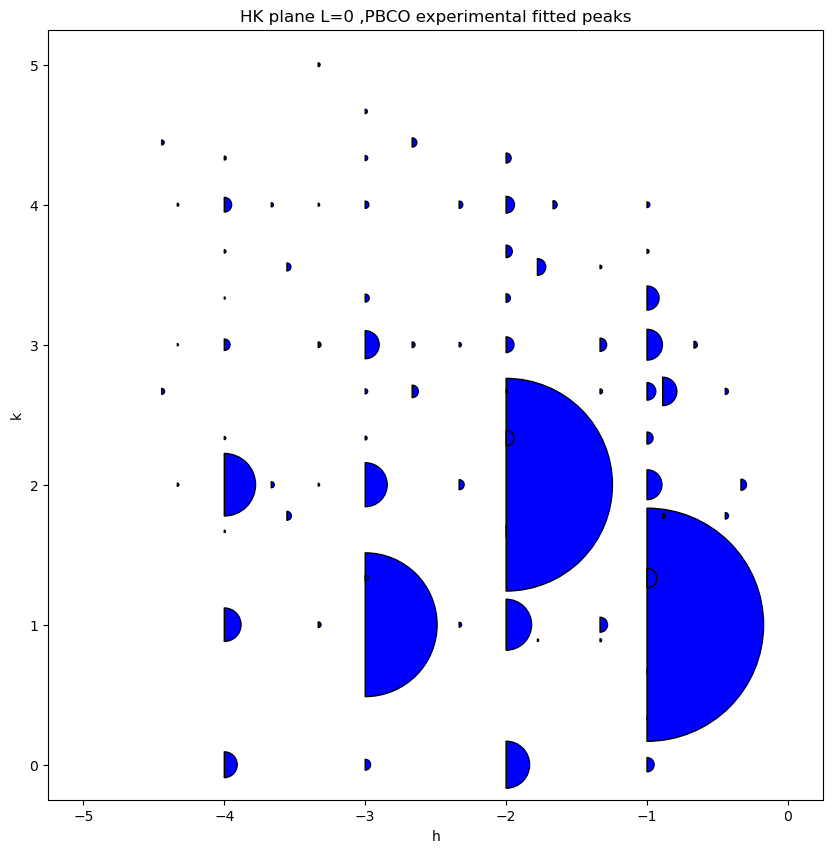

In [8]:
# Load data
h_coords = pd.read_csv('raw_data/dim3/h_coords.csv', header=None).values.flatten()
k_coords = pd.read_csv('raw_data/dim3/k_coords.csv', header=None).values.flatten()
intensity_arr = pd.read_csv('raw_data/dim3/intensity_arr1_copy.csv', header=None).values

h , k = np.meshgrid(h_coords , k_coords)

h_flat = h.flatten()
k_flat = k.flatten()
intensity_flat = intensity_arr.flatten()

# copy_h_flat = h_flat
# h_flat = l_flat
# l_flat = copy_h_flat


pyplot.scatter(h_flat , k_flat , s=intensity_flat *10 , color='blue', edgecolor="black",
               label='Exp', marker=markers.MarkerStyle("o", fillstyle="right"))
#change figure size
pyplot.gcf().set_size_inches(10, 10)
#add labels
pyplot.xlabel('h')
pyplot.ylabel('k')
#add title
pyplot.title('HK plane L=0 ,PBCO experimental fitted peaks')

create a csv file with 4 columns. first column is for h_coords, then for k_coords, and then for l_coords (all equal to 0). then another row for the experimental intensity, with title 'intensity_exp'.

In [9]:
#create a csv file with the data, and each first row is the name of the column : h ,k , l , intensity_exp
data = pd.DataFrame({
    'h': h_flat,
    'k': k_flat,
    'l': np.zeros_like(h_flat),
    'intensity_exp': intensity_flat,
    'intensity_exp_err' : np.zeros_like(h_flat)
})

#remove all rows where the intensity_exp is nan
data = data[~data['intensity_exp'].isna()]

#remove all rows where h and k are both integers
# data = data[~((data['h'] % 1 == 0) & (data['k'] % 1 == 0))]
#remove all rows where either h or k are both less than 1
data = data[~((data['h'] < 1) & (data['k'] < 1))]
#remove all rows where k is an integer
#data = data[~(data['k'] % 1 == 0)]


data.to_csv('raw_data/dim3/dim3_bragg.csv', index=False)
print(data)

             h    k    l  intensity_exp  intensity_exp_err
415  -0.111111  1.0  0.0       0.000000                0.0
416  -0.222222  1.0  0.0       0.000000                0.0
417  -0.333333  1.0  0.0       2.210926                0.0
418  -0.444444  1.0  0.0       0.000000                0.0
419  -0.555556  1.0  0.0       0.000000                0.0
...        ...  ...  ...            ...                ...
2111 -4.555556  5.0  0.0       0.000000                0.0
2112 -4.666667  5.0  0.0       0.000000                0.0
2113 -4.777778  5.0  0.0       0.000000                0.0
2114 -4.888889  5.0  0.0       0.000000                0.0
2115 -5.000000  5.0  0.0       0.000000                0.0

[1476 rows x 5 columns]


# dim2

In [10]:
# Load data
h_coords = pd.read_csv('raw_data/dim2/h_coords.csv', header=None).values.flatten()
l_coords = pd.read_csv('raw_data/dim2/l_coords.csv', header=None).values.flatten()
intensity_arr = pd.read_csv('raw_data/dim2/intensity_arr1.csv', header=None).values
extra_intensity = np.zeros([136 , 90])
intensity_arr = np.concatenate((intensity_arr, extra_intensity), axis=1)


In [11]:
h , l = np.meshgrid(h_coords , l_coords)

h_flat = h.flatten()
l_flat = l.flatten()
intensity_flat = intensity_arr.flatten()

#create a csv file with the data, and each first row is the name of the column : h ,k , l , intensity_exp
data = pd.DataFrame({
    'h': h_flat,
    'k': np.zeros_like(h_flat),
    'l': l_flat,
    'intensity_exp': intensity_flat,
    'intensity_exp_err' : np.zeros_like(h_flat)
})

#remove all rows where the intensity_exp is nan
data = data[~data['intensity_exp'].isna()]

#remove all rows where h and k are both integers
# data = data[~((data['h'] % 1 == 0) & (data['l'] % 1 == 0))]
#remove all rows where either h is smaller than -5
data = data[data['h'] >= -5]
data['l'] = np.round(data['l'] * 9)
data['l'] = data['l'].astype(int)
# keep all rows where l is not divisible by 
data = data[data['l'] % (3) == 0]
data['l'] = data['l'].astype(float)
data['l'] = data['l'] / 9
#remove all rows where h is an integer
#data = data[~(data['h'] % 1 == 0)]

data.to_csv('raw_data/dim2/dim2_bragg.csv', index=False)
print(data)

              h    k     l  intensity_exp  intensity_exp_err
0     -0.000000  0.0   0.0            0.0                0.0
1     -0.111111  0.0   0.0            0.0                0.0
2     -0.222222  0.0   0.0            0.0                0.0
3     -0.333333  0.0   0.0            0.0                0.0
4     -0.444444  0.0   0.0            0.0                0.0
...         ...  ...   ...            ...                ...
18400 -4.444444  0.0  15.0            0.0                0.0
18401 -4.555556  0.0  15.0            0.0                0.0
18402 -4.666667  0.0  15.0            0.0                0.0
18403 -4.777778  0.0  15.0            0.0                0.0
18404 -4.888889  0.0  15.0            0.0                0.0

[1978 rows x 5 columns]


Length of h_coords: 136, Length of l_coords: 136


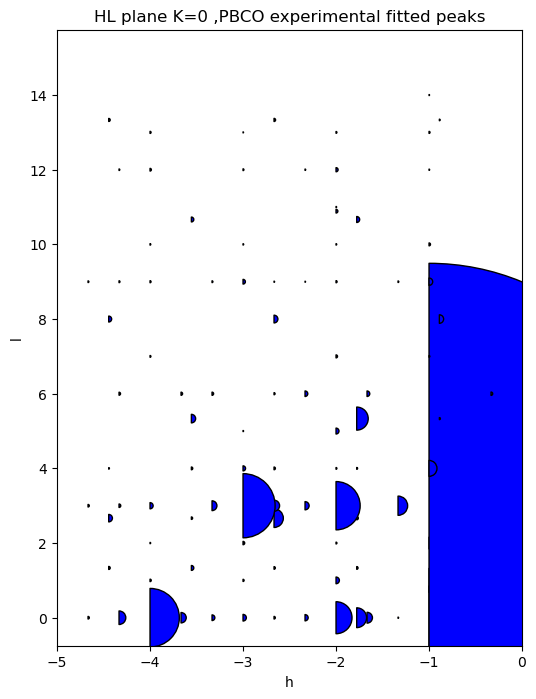

In [12]:


#extend h_coords to match the length of l_coords

print(f"Length of h_coords: {len(h_coords)}, Length of l_coords: {len(l_coords)}")

h , l = np.meshgrid(h_coords , l_coords)

h_flat = h.flatten()
l_flat = l.flatten()
intensity_flat = intensity_arr.flatten()

# copy_h_flat = h_flat
# h_flat = l_flat
# l_flat = copy_h_flat


pyplot.scatter(h_flat , l_flat , s=intensity_flat *2 , color='blue', edgecolor="black",
               label='Exp', marker=markers.MarkerStyle("o", fillstyle="right"))
#change figure size
#pyplot.gcf().set_size_inches(10, 10)
#add labels
pyplot.xlabel('h')
pyplot.ylabel('l')
#add title
pyplot.title('HL plane K=0 ,PBCO experimental fitted peaks')
pyplot.xlim(-5 , 0)
#figure size
pyplot.gcf().set_size_inches(6, 8)

# dim1

In [13]:
# Load data
k_coords = pd.read_csv('raw_data/dim1/k_coords.csv', header=None).values.flatten()
l_coords = pd.read_csv('raw_data/dim1/l_coords.csv', header=None).values.flatten()
intensity_arr = pd.read_csv('raw_data/dim1/intensity_arr1.csv', header=None).values
print(f"Length of k_coords: {len(k_coords)}, Length of l_coords: {len(l_coords)}")

extra_intensity = np.zeros([136 , 90])
intensity_arr = np.concatenate((intensity_arr, extra_intensity), axis=1)

Length of k_coords: 136, Length of l_coords: 136


In [14]:
k , l = np.meshgrid(k_coords , l_coords)

k_flat = k.flatten()
l_flat = l.flatten()
intensity_flat = intensity_arr.flatten()
print(f"Length of k_flat: {len(k_flat)}, Length of l_flat: {len(l_flat)}, Length of intensity_flat: {len(intensity_flat)}")

#create a csv file with the data, and each first row is the name of the column : h ,k , l , intensity_exp
data = pd.DataFrame({
    'h': np.zeros_like(k_flat),
    'k': k_flat,
    'l': l_flat,
    'intensity_exp': intensity_flat,
    'intensity_exp_err' : np.zeros_like(k_flat)
})

#remove all rows where the intensity_exp is nan
data = data[~data['intensity_exp'].isna()]

#remove all rows where h and k are both integers
# data = data[~((data['l'] % 1 == 0) & (data['k'] % 1 == 0))]
#remove all rows where either h is smaller than -5
data = data[data['k'] >= -5]
data['l'] = np.round(data['l'] * 9)
data['l'] = data['l'].astype(int)
# keep all rows where l is not divisible by 
data = data[data['l'] % (3) == 0]
data['l'] = data['l'].astype(float)
data['l'] = data['l'] / 9
#remove all rows where k is an integer
#data = data[~(data['k'] % 1 == 0)]



data.to_csv('raw_data/dim1/dim1_bragg.csv', index=False)
print(data)

Length of k_flat: 18496, Length of l_flat: 18496, Length of intensity_flat: 18496
         h         k     l  intensity_exp  intensity_exp_err
0      0.0 -0.000000   0.0            0.0                0.0
1      0.0 -0.111111   0.0            0.0                0.0
2      0.0 -0.222222   0.0            0.0                0.0
3      0.0 -0.333333   0.0            0.0                0.0
4      0.0 -0.444444   0.0            0.0                0.0
...    ...       ...   ...            ...                ...
18377  0.0 -1.888889  15.0            0.0                0.0
18378  0.0 -2.000000  15.0            0.0                0.0
18379  0.0 -2.111111  15.0            0.0                0.0
18380  0.0 -2.222222  15.0            0.0                0.0
18381  0.0 -2.333333  15.0            0.0                0.0

[1859 rows x 5 columns]


Length of k_coords: 136, Length of l_coords: 136


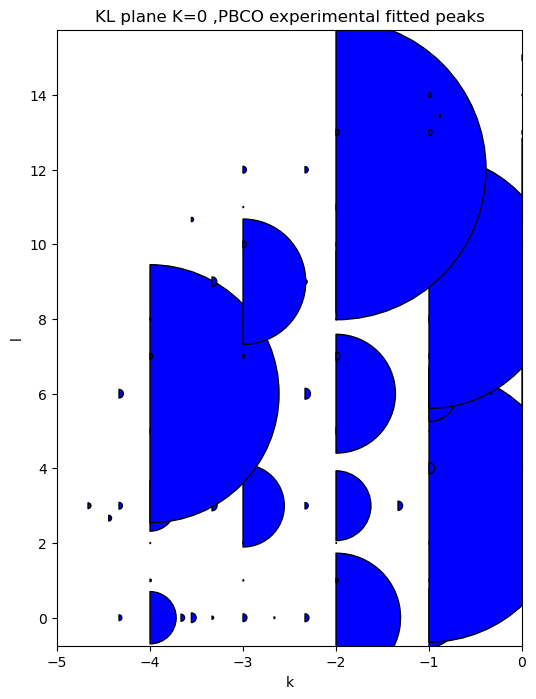

In [15]:
print(f"Length of k_coords: {len(k_coords)}, Length of l_coords: {len(l_coords)}")


pyplot.scatter(k_flat , l_flat , s=intensity_flat *2 , color='blue', edgecolor="black",
               label='Exp', marker=markers.MarkerStyle("o", fillstyle="right"))
#change figure size
#pyplot.gcf().set_size_inches(10, 10)
#add labels
pyplot.xlabel('k')
pyplot.ylabel('l')
#add title
pyplot.title('KL plane K=0 ,PBCO experimental fitted peaks')
pyplot.xlim(-5 , 0)
#figure size
pyplot.gcf().set_size_inches(6, 8)

# concatinate all the peaks together

In [16]:
dim1 = pd.read_csv('raw_data/dim1/dim1_bragg.csv')
dim2 = pd.read_csv('raw_data/dim2/dim2_bragg.csv')
dim3 = pd.read_csv('raw_data/dim3/dim3_bragg.csv')



# concatinate all the peaks together
data = pd.concat([dim1, dim2, dim3], ignore_index=True)
print(data)

#average all the peaks together, if they have the same h, k, l
# data = data.groupby(['h', 'k', 'l'], as_index=False).agg({
#     'intensity_exp': 'mean',
#     'intensity_exp_err': 'mean'
# })

print(data.shape)

data.to_csv('raw_data/combined_peaks_bragg.csv', index=False)


intensity_exp = data['intensity_exp'].astype(float)
intensity_exp = np.log10(intensity_exp + 1) 
data['intensity_exp'] = intensity_exp

data.to_csv('raw_data/LOGcombined_peaks_bragg.csv', index=False)


             h         k    l  intensity_exp  intensity_exp_err
0     0.000000 -0.000000  0.0            0.0                0.0
1     0.000000 -0.111111  0.0            0.0                0.0
2     0.000000 -0.222222  0.0            0.0                0.0
3     0.000000 -0.333333  0.0            0.0                0.0
4     0.000000 -0.444444  0.0            0.0                0.0
...        ...       ...  ...            ...                ...
5308 -4.555556  5.000000  0.0            0.0                0.0
5309 -4.666667  5.000000  0.0            0.0                0.0
5310 -4.777778  5.000000  0.0            0.0                0.0
5311 -4.888889  5.000000  0.0            0.0                0.0
5312 -5.000000  5.000000  0.0            0.0                0.0

[5313 rows x 5 columns]
(5313, 5)


# debye-waller factor calculation

XU.materials: Warning: element Pr used instead of Pr+3
XU.materials: Warning: element O used instead of O-2
XU.materials: Warning: element O used instead of O-2
XU.materials: Warning: element O used instead of O-2
XU.materials: Warning: element Ni used instead of Ni+1
XU.materials: Warning: element Ni used instead of Ni+1
m: 9.61448467718729e-26
tD: 742.0049692874996
d_1: 0.7577305964903922
exp_fact: 0.0015874096909496505


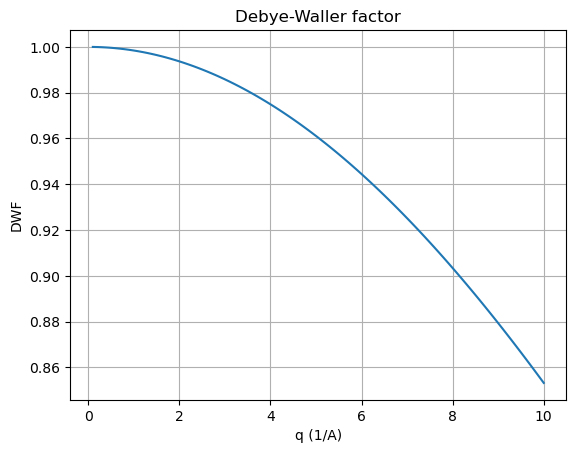

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants
import math
import xrayutilities as xu


crystal = xu.materials.Crystal.fromCIF('C:/Users/User/Desktop/uzh_intern/CrystalClearFit/alrisDistortionFit/P63_giant_cell.cif')
m = 0.0
im = 0
for a, _, _, b in crystal.lattice.base():
    m += a.weight
    im += 1
m = m / float(im)

print(f"m: {m}")


def Debye1(x):
    """
    function to calculate the first Debye function [1]_ as needed
    for the calculation of the thermal Debye-Waller-factor
    by numerical integration

    .. math:: D_1(x) = (1/x) \int_0^x t/(\exp(t)-1) dt

    Parameters
    ----------
    x : float
        argument of the Debye function

    Returns
    -------
    float
        D1(x)  float value of the Debye function

    References
    ----------
    .. [1] http://en.wikipedia.org/wiki/Debye_function
     """

    def __int_kernel(t):
        """
        integration kernel for the numeric integration
        """
        y = t / (np.exp(t) - 1)
        return y

    if x > 0.:
        integral = scipy.integrate.quad(__int_kernel, 0, x)
        d1 = (1 / float(x)) * integral[0]
    else:
        integral = (0, 0)
        d1 = 1.

    return d1


temp = 673  # Kelvin
# W(q) = 3/2* hbar^2*q^2/(m*kB*tD) * (D1(tD/T)/(tD/T) + 1/4)
# DWF = exp(-W(q)) consistent with Vaclav H. and several books
hbar = scipy.constants.hbar
kb = scipy.constants.Boltzmann
angs = 1.0e-10
cell_length_a = 7.32000
cell_length_b = 11.04501
cell_length_c = 5.52250
volume = cell_length_a * cell_length_b * cell_length_c
volume = volume * (angs ** 3)  # m^3
n_atoms = 32
sound_v = 6000  # m/s
tD = (hbar * sound_v)/kb * ((6*n_atoms*np.pi**2)/volume) ** (1 / 3)  # Debye temperature
print(f"tD: {tD}")

d_1 = Debye1(tD / temp)
print(f"d_1: {d_1}")
x = tD / temp
exp_fact = 3 / 2. * hbar ** 2 * 1.0e20 / (m * kb * tD) * (Debye1(x) / x + 0.25)
print(f"exp_fact: {exp_fact}")
example_qs = np.linspace(0.1, 10, 100)
dwf = np.exp(-exp_fact * example_qs ** 2)
plt.plot(example_qs, dwf)
plt.xlabel('q (1/A)')
plt.ylabel('DWF')
plt.title('Debye-Waller factor')
plt.grid()
plt.savefig('debye_waller.png')


m: 9.173748612728253e-26
hbar: 1.0545718176461565e-34
kb: 1.380649e-23
tD: 753.1888376153266
d_1: 0.21778896347084634
exp_fact: 0.0004877332589381476


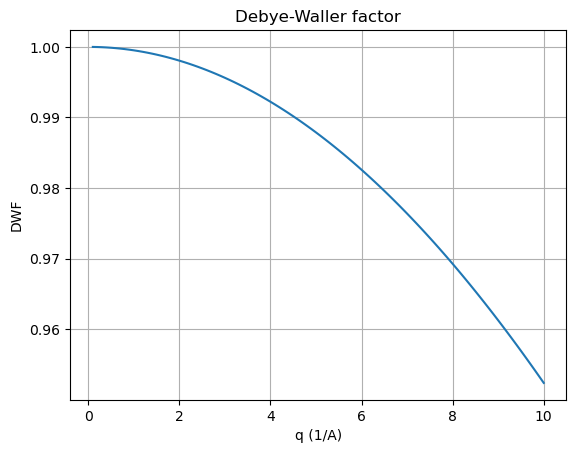

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants
import math
import xrayutilities as xu

crystal = xu.materials.Crystal.fromCIF('C:/Users/User/Desktop/uzh_intern/CrystalClearFit/alrisDistortionFit/PBCO/new_PBCO_fit/new_PBCO.cif')
m = 0.0
im = 0
for a, _, _, b in crystal.lattice.base():
    m += a.weight
    im += 1
m = m / float(im)

print(f"m: {m}")


def Debye1(x):
    """
    function to calculate the first Debye function [1]_ as needed
    for the calculation of the thermal Debye-Waller-factor
    by numerical integration

    .. math:: D_1(x) = (1/x) \int_0^x t/(\exp(t)-1) dt

    Parameters
    ----------
    x : float
        argument of the Debye function

    Returns
    -------
    float
        D1(x)  float value of the Debye function

    References
    ----------
    .. [1] http://en.wikipedia.org/wiki/Debye_function
     """

    def __int_kernel(t):
        """
        integration kernel for the numeric integration
        """
        y = t / (np.exp(t) - 1)
        return y

    if x > 0.:
        integral = scipy.integrate.quad(__int_kernel, 0, x)
        d1 = (1 / float(x)) * integral[0]
    else:
        integral = (0, 0)
        d1 = 1.

    return d1


temp = 100  # Kelvin
# W(q) = 3/2* hbar^2*q^2/(m*kB*tD) * (D1(tD/T)/(tD/T) + 1/4)
# DWF = exp(-W(q)) consistent with Vaclav H. and several books
hbar = scipy.constants.hbar
kb = scipy.constants.Boltzmann
print(f"hbar: {hbar}")
print(f"kb: {kb}")
angs = 1.0e-10
cell_length_a = 3.82030#34.38270
cell_length_b = 3.88548  # 311.68350 * 3
cell_length_c = 11.6835 # 34.96932
volume = cell_length_a * cell_length_b * cell_length_c
volume = volume * (angs ** 3)  # m^3
n_atoms = 13 # 3159
sound_v = 6000  # m/s
tD = (hbar * sound_v)/kb * ((6*n_atoms*np.pi**2)/volume) ** (1 / 3)  # Debye temperature
print(f"tD: {tD}")

d_1 = Debye1(tD / temp)
print(f"d_1: {d_1}")
x = tD / temp
exp_fact = 3 / 2. * hbar ** 2 * 1.0e20 / (m * kb * tD) * (Debye1(x) / x + 0.25)
print(f"exp_fact: {exp_fact}")
example_qs = np.linspace(0.1, 10, 100)
dwf = np.exp(-exp_fact * example_qs ** 2)
plt.plot(example_qs, dwf)
plt.xlabel('q (1/A)')
plt.ylabel('DWF')
plt.title('Debye-Waller factor')
plt.grid()
plt.savefig('debye_waller.png')


Find where to add the shifts in the list of atom coordinates. 

add the atom displacement distortions

In [67]:
#load a text file into a dataframe
PBCO_coords = pd.read_csv('raw_data/PBCO_coords.txt' , delim_whitespace=True, header=None)
PBCO_distortions = pd.read_csv('raw_data/PBCO_atom_site_fract_symmform.txt' , delim_whitespace=True, header=None)

#load PBCO_distortions into a list of lists
PBCO_distortions = PBCO_distortions.values.tolist()
PBCO_coords = PBCO_coords.values.tolist()

#create a new column in PBCO_distortions, which adds the second column up cumulatively
PBCO_distortions = pd.DataFrame(PBCO_distortions)
PBCO_coords = pd.DataFrame(PBCO_coords)

PBCO_coords[2] = PBCO_coords[2].astype(str)
PBCO_coords[3] = PBCO_coords[3].astype(str)
PBCO_coords[4] = PBCO_coords[4].astype(str)

print(PBCO_distortions)

PBCO_distortions[5] = PBCO_distortions[1].cumsum()

#create a list to store all the names of shift name variables
shift_names = []

for i in range(len(PBCO_distortions)):
    #take the ith and ith + 1 element in the last column, and load them into a variable called num_atom_start and num_atom_end. if i is 1 , then num_atom_start must equal to 1, and num_atom_end must equal to the first element in the last column
    if i == 0:
        num_atom_start = 0
        num_atom_end = PBCO_distortions.iloc[i, -1]
    else:
        num_atom_start = PBCO_distortions.iloc[i, -1] - PBCO_distortions.iloc[i, 1]
        num_atom_end = PBCO_distortions.iloc[i, -1]
    
    #check if there are Dx , Dy , Dz in the 3rd , 4th and 5th columns of PBCO_distortions
    if 'Dx' in PBCO_distortions.iloc[i, 2]:
        #string the char in the first column ith row to 'Dx'
        dx_shift_name = PBCO_distortions.iloc[i, 0] + '_Dx'
    else:
        dx_shift_name = 0
    if 'Dy' in PBCO_distortions.iloc[i, 3]:
        #string the char in the first column ith row to 'Dy'
        dy_shift_name = PBCO_distortions.iloc[i, 0] + '_Dy'
    else:
        dy_shift_name = 0
    if 'Dz' in PBCO_distortions.iloc[i, 4]:
        #string the char in the first column ith row to 'Dz'
        dz_shift_name = PBCO_distortions.iloc[i, 0] + '_Dz' 
    else:
        dz_shift_name = 0



    if dx_shift_name != 0:
        shift_names.append(dx_shift_name)
        for j in range(num_atom_start, num_atom_end):
            PBCO_coords.iloc[j, 2] = str(PBCO_coords.iloc[j, 2] + ' + ') + dx_shift_name
    if dy_shift_name != 0:
        shift_names.append(dy_shift_name)
        for j in range(num_atom_start, num_atom_end):
            PBCO_coords.iloc[j, 3] = str(PBCO_coords.iloc[j, 3] + ' + ') + dy_shift_name
    if dz_shift_name != 0:
        shift_names.append(dz_shift_name)
        for j in range(num_atom_start, num_atom_end):
            PBCO_coords.iloc[j, 4] = str(PBCO_coords.iloc[j, 4] + ' + ') + dz_shift_name


for k in range(len(PBCO_coords)):
    PBCO_coords.iloc[k, 0] = str("['" + PBCO_coords.iloc[k, 0] + "'")
    PBCO_coords.iloc[k, 2] = str('[' + PBCO_coords.iloc[k, 2])
    PBCO_coords.iloc[k, 4] = str(PBCO_coords.iloc[k, 4] + "]],")

print(PBCO_coords)
#save PBCO_coords to a csv file
PBCO_coords.to_csv('raw_data/PBCO_coords_processed.txt', index=False, header=False)


print(shift_names)
# Convert shift_names to a DataFrame
shift_names = pd.DataFrame(shift_names)
#print all shift_names into a single line
shift_names_txt = shift_names[0].str.cat(sep=', ')
print(shift_names)
# Save shift_names to a text file
with open('raw_data/shift_names.txt', 'w') as f:
    f.write(shift_names_txt)


C:\Users\User\AppData\Local\Temp\ipykernel_25560\2781394630.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  PBCO_coords = pd.read_csv('raw_data/PBCO_coords.txt' , delim_whitespace=True, header=None)
C:\Users\User\AppData\Local\Temp\ipykernel_25560\2781394630.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  PBCO_distortions = pd.read_csv('raw_data/PBCO_atom_site_fract_symmform.txt' , delim_whitespace=True, header=None)


         0  1   2   3   4
0    Pr1_1  4  Dx   0  Dz
1    Pr1_2  4  Dx   0  Dz
2    Pr1_3  4  Dx   0  Dz
3    Pr1_4  4  Dx   0  Dz
4    Pr1_5  2  Dx   0   0
..     ... ..  ..  ..  ..
195  O4_21  4  Dx  Dy   0
196  O4_22  8  Dx  Dy  Dz
197  O4_23  8  Dx  Dy  Dz
198  O4_24  8  Dx  Dy  Dz
199  O4_25  8  Dx  Dy  Dz

[200 rows x 5 columns]
          0     1                    2                  3  \
0     ['Pr'  '59'  [0.94444 + Pr1_1_Dx                0.5   
1     ['Pr'  '59'  [0.05556 + Pr1_1_Dx                0.5   
2     ['Pr'  '59'  [0.05556 + Pr1_1_Dx                0.5   
3     ['Pr'  '59'  [0.94444 + Pr1_1_Dx                0.5   
4     ['Pr'  '59'  [0.94444 + Pr1_2_Dx                0.5   
...     ...   ...                  ...                ...   
1048   ['O'   '8'  [0.44444 + O4_25_Dx  0.8416 + O4_25_Dy   
1049   ['O'   '8'  [0.55556 + O4_25_Dx  0.8416 + O4_25_Dy   
1050   ['O'   '8'  [0.44444 + O4_25_Dx  0.1584 + O4_25_Dy   
1051   ['O'   '8'  [0.44444 + O4_25_Dx  0.8416 + O4_25

Preprocess get mode amplitudes

In [167]:
mode_names = pd.read_csv('raw_data/displacivemode_names.txt' , delim_whitespace=True, header=None)
mode_matrix = pd.read_csv('raw_data/mode_matrix.txt' , delim_whitespace=True, header=None)

#CONVERT TO A LIST OF LISTS
mode_names = mode_names.values.tolist()

# Convert mode_names to a DataFrame
mode_names = pd.DataFrame(mode_names)

num_modes = len(mode_names) 
print(num_modes)

mode_name1 = []
# rewrite the mode names into a new list with the first column as the mode name 
for i in range(num_modes):
    mode_name1.append(str('"' + str(mode_names.iloc[i, 1]) + '"' + ': '))

print(mode_name1)


445
['"[1/9,1/9,0]V1(a,0;a,0)[Pr1:h:dsp]B3u(a)": ', '"[1/9,1/9,0]V1(a,0;a,0)[Pr1:h:dsp]B2u(a)": ', '"[0,1/9,0]DT1(a,0)[Pr1:h:dsp]B2u(a)": ', '"[0,2/9,0]DT1(a,0)[Pr1:h:dsp]B2u(a)": ', '"[0,1/3,0]DT1(a,0)[Pr1:h:dsp]B2u(a)": ', '"[0,4/9,0]DT1(a,0)[Pr1:h:dsp]B2u(a)": ', '"[1/9,0,0]SM1(a,0)[Pr1:h:dsp]B3u(a)": ', '"[2/9,0,0]SM1(a,0)[Pr1:h:dsp]B3u(a)": ', '"[1/3,0,0]SM1(a,0)[Pr1:h:dsp]B3u(a)": ', '"[4/9,0,0]SM1(a,0)[Pr1:h:dsp]B3u(a)": ', '"[1/9,2/9,0]V1(a,0;a,0)[Pr1:h:dsp]B3u(a)": ', '"[1/9,2/9,0]V1(a,0;a,0)[Pr1:h:dsp]B2u(a)": ', '"[1/9,1/3,0]V1(a,0;a,0)[Pr1:h:dsp]B3u(a)": ', '"[1/9,1/3,0]V1(a,0;a,0)[Pr1:h:dsp]B2u(a)": ', '"[1/9,4/9,0]V1(a,0;a,0)[Pr1:h:dsp]B3u(a)": ', '"[1/9,4/9,0]V1(a,0;a,0)[Pr1:h:dsp]B2u(a)": ', '"[2/9,1/9,0]V1(a,0;a,0)[Pr1:h:dsp]B3u(a)": ', '"[2/9,1/9,0]V1(a,0;a,0)[Pr1:h:dsp]B2u(a)": ', '"[2/9,2/9,0]V1(a,0;a,0)[Pr1:h:dsp]B3u(a)": ', '"[2/9,2/9,0]V1(a,0;a,0)[Pr1:h:dsp]B2u(a)": ', '"[2/9,1/3,0]V1(a,0;a,0)[Pr1:h:dsp]B3u(a)": ', '"[2/9,1/3,0]V1(a,0;a,0)[Pr1:h:dsp]B2u(a)": ', '

C:\Users\User\AppData\Local\Temp\ipykernel_25560\395762485.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  mode_names = pd.read_csv('raw_data/displacivemode_names.txt' , delim_whitespace=True, header=None)
C:\Users\User\AppData\Local\Temp\ipykernel_25560\395762485.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  mode_matrix = pd.read_csv('raw_data/mode_matrix.txt' , delim_whitespace=True, header=None)


In [168]:
#make a zeros array with len(shift_names) rows and columns
mode_np_matrix = np.zeros((num_modes, num_modes))

print(mode_np_matrix.shape)
print(mode_np_matrix)

#load the third column values from mode_matrix into mode_np_matrix.first column of ith row is the row number of the matrix, second column is the column number of the matrix, third column is the value of the matrix
for i in range(len(mode_matrix)):
    row = mode_matrix.iloc[i, 0] - 1
    col = mode_matrix.iloc[i, 1] - 1
    value = mode_matrix.iloc[i, 2]
    mode_np_matrix[row, col] = value

print(mode_np_matrix)


print(mode_name1)


for row in range(num_modes):
    for col in range(num_modes):
        if mode_np_matrix[row, col] != 0:
            shift_name = shift_names.iloc[col,0]
            
            if mode_np_matrix[row, col] < 0:
                matrix_element = mode_np_matrix[row, col] * -1
                string_mode_np_matrix = str(matrix_element)
                dependent = ' - ' + string_mode_np_matrix + ' * ' + shift_name
            else:
                string_mode_np_matrix = str(mode_np_matrix[row, col])
                dependent = ' + ' + string_mode_np_matrix + ' * ' + shift_name
            
            mode_name1[row] = str(mode_name1[row]) + dependent
        else:
            mode_name1[row] = str(mode_name1[row])



# Save mode_names to a text file without using pandas
with open('raw_data/mode_names_processed.txt', 'w') as f:
    for name in mode_name1:
        f.write(name + ',' + '\n')


'''mode_names_txt = pd.DataFrame(mode_name1)
mode_names_txt.to_csv('raw_data/mode_names_processed.txt', index=False, header=False)

'''


(445, 445)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[-0.32635  0.       0.      ...  0.       0.       0.     ]
 [ 0.       0.32635  0.3473  ...  0.       0.       0.     ]
 [-0.17365  0.       0.      ...  0.       0.       0.     ]
 ...
 [ 0.       0.       0.      ...  0.       0.      -0.17365]
 [ 0.       0.       0.      ...  0.03015  0.       0.     ]
 [ 0.       0.       0.      ...  0.      -0.17365  0.     ]]
['"[1/9,1/9,0]V1(a,0;a,0)[Pr1:h:dsp]B3u(a)": ', '"[1/9,1/9,0]V1(a,0;a,0)[Pr1:h:dsp]B2u(a)": ', '"[0,1/9,0]DT1(a,0)[Pr1:h:dsp]B2u(a)": ', '"[0,2/9,0]DT1(a,0)[Pr1:h:dsp]B2u(a)": ', '"[0,1/3,0]DT1(a,0)[Pr1:h:dsp]B2u(a)": ', '"[0,4/9,0]DT1(a,0)[Pr1:h:dsp]B2u(a)": ', '"[1/9,0,0]SM1(a,0)[Pr1:h:dsp]B3u(a)": ', '"[2/9,0,0]SM1(a,0)[Pr1:h:dsp]B3u(a)": ', '"[1/3,0,0]SM1(a,0)[Pr1:h:dsp]B3u(a)": ', '"[4/9,0,0]SM1(a,0)[Pr1:h:dsp]B3u(a)": ', '"[1/9,2/9,0]V1(a,0;a,0)[Pr1:h

"mode_names_txt = pd.DataFrame(mode_name1)\nmode_names_txt.to_csv('raw_data/mode_names_processed.txt', index=False, header=False)\n\n"

# fit the mode amplitudes directly

In [14]:
mode_amp_bounds = pd.read_csv('raw_data/mode_amp_bounds.txt' , delim_whitespace=True, header=None)

max_bound_vectors   = mode_amp_bounds.iloc[:, 6].values.tolist()

mode_names_variable = mode_amp_bounds.iloc[:, 1].values.tolist()

#remove '!' from all elements in mode_names
mode_names_variable = [name.replace('!', '') for name in mode_names]


print(mode_amp_bounds)
print(max_bound_vectors)
print(mode_names_variable)
with open('raw_data/mode_names_variable.txt', 'w') as f:
    for name in mode_names_variable:
        f.write(name + ',')

with open('raw_data/max_bound_vectors.txt', 'w') as f:
    for vector in max_bound_vectors:
        f.write(str(vector) + ',')

       0      1    2    3     4    5     6  \
0    prm    !a1  0.0  min -4.57  max  4.57   
1    prm    !a2  0.0  min -4.57  max  4.57   
2    prm    !a3  0.0  min -6.46  max  6.46   
3    prm    !a4  0.0  min -6.46  max  6.46   
4    prm    !a5  0.0  min -7.35  max  7.35   
..   ...    ...  ...  ...   ...  ...   ...   
440  prm  !a441  0.0  min -7.35  max  7.35   
441  prm  !a442  0.0  min -6.46  max  6.46   
442  prm  !a443  0.0  min -6.36  max  6.36   
443  prm  !a444  0.0  min -6.46  max  6.46   
444  prm  !a445  0.0  min -6.46  max  6.46   

                                          7       8  
0    'Pmmm[1/9,1/9,0]V1(a,0;a,0)[Pr1:h:dsp]  B3u(a)  
1    'Pmmm[1/9,1/9,0]V1(a,0;a,0)[Pr1:h:dsp]  B2u(a)  
2         'Pmmm[0,1/9,0]DT1(a,0)[Pr1:h:dsp]  B2u(a)  
3         'Pmmm[0,2/9,0]DT1(a,0)[Pr1:h:dsp]  B2u(a)  
4         'Pmmm[0,1/3,0]DT1(a,0)[Pr1:h:dsp]  B2u(a)  
..                                      ...     ...  
440   'Pmmm[4/9,1/3,0]V1(a,0;a,0)[O4:q:dsp]   B2(a)  
441   'Pmmm[4/9

C:\Users\User\AppData\Local\Temp\ipykernel_15980\2430929897.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  mode_amp_bounds = pd.read_csv('raw_data/mode_amp_bounds.txt' , delim_whitespace=True, header=None)


In [44]:
delta_transform = pd.read_csv('raw_data/delta_transformation.txt' ,header=None)
delta_transform = pd.DataFrame(delta_transform)

print(delta_transform)

# Convert delta_transform to a list of lists
delta_transform = delta_transform.values.tolist()

with open('raw_data/delta_transformation_processed.txt', 'w') as f:
    for row in delta_transform:
        f.write( str(row)  + ',\n')

                                                     0
0    -  0.00208*a1 -  0.00156*a7 -  0.00294*a8 -  0...
1    +  0.00204*a2 +  0.00154*a3 +  0.00289*a4 +  0...
2    -  0.00111*a1 -  0.00156*a7 -  0.00294*a8 -  0...
3    +  0.00517*a2 +  0.00389*a3 +  0.00389*a4 -  0...
4    +  0.00038*a1 -  0.00156*a7 -  0.00294*a8 -  0...
..                                                 ...
440  +  0.00632*a381 +  0.00672*a384 -  0.00476*a38...
441  -  0.00366*a382 +  0.00275*a386 -  0.00275*a38...
442  -  0.00147*a383 +  0.00111*a394 -  0.00208*a39...
443  +  0.01188*a381 +  0.00672*a384 -  0.00894*a38...
444  -  0.00144*a382 +  0.00109*a386 -  0.00204*a38...

[445 rows x 1 columns]
